In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

c:\Users\afias\anaconda3\envs\dev\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read nyc data
nyc_df = pd.read_csv(Path('encoded_data.csv'), index_col=0)

# Display sample data
nyc_df.head()

,trip_length_miles,trip_time_seconds,base_passenger_fare_dollars,tolls_dollars,black_car_fund_dollars,sales_tax_dollars,congestion_surcharge_dollars,airport_fee_dollars,tip_dollars,driver_pay_dollars,...,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,pickup_borough_Staten Island,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,2.06,660,23.87,0.0,0.72,2.12,0.00,0.0,0.0,14.02,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.38,1379,41.66,0.0,1.25,3.70,0.00,0.0,0.0,33.24,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.39,590,34.03,0.0,1.02,3.02,2.75,0.0,0.0,45.18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.24,461,35.71,0.0,1.07,3.17,0.00,0.0,0.0,31.67,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.76,1029,27.69,0.0,0.83,2.46,0.00,0.0,0.0,22.54,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
nyc_df ['tip_or_no_tip']= np.where(nyc_df['tip_or_no_tip'] > 0, 1, 0)

In [4]:
# Split the data into X (features) and y (target)
X = nyc_df.drop(columns=['tip_or_no_tip'])

# X variable all features except the target
y = nyc_df['tip_or_no_tip']

In [5]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# Print Shape of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 664)
(9000,)
(3000, 664)
(3000,)


In [7]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Check value count
nyc_df['tip_or_no_tip'].value_counts()

tip_or_no_tip
0    9617
1    2383
Name: count, dtype: int64

## Fit two versions of a random forest model to the data: a regular `RandomForest` classifier, and a `BalancedRandomForest` classifier.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=108, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

In [10]:
# Import BalancedRandomForestClassifier from imblearn
from imblearn.ensemble import BalancedRandomForestClassifier

# Instantiate a BalancedRandomForestClassifier instance
brf = BalancedRandomForestClassifier()

# Fit the model to the training data
brf.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier()

In [11]:
# Predict labels for testing features
brf_predictions = brf.predict(X_test_scaled)

## Resample and fit the training data by implementing a method for imbalanced data, such as `RandomOverSampler`, undersampling, or a synthetic technique. Re-esimate by `RandomForest`.

In [12]:
# Import SMOTE from imblearn
from imblearn.combine import SMOTEENN

In [13]:
# Instantiate the SMOTE model instance
sn_sampler = SMOTEENN(random_state=0)#sampling_strategy='auto'#

# Fit the SMOTE model to the training data
X_resampled, y_resampled = sn_sampler.fit_resample(X_train, y_train)

# Fit the RandomForestClassifier on the resampled data
model_resampled_rf = RandomForestClassifier()
model_resampled_rf.fit(X_resampled, y_resampled)

# Generate predictions based on the resampled data model
rf_resampled_predictions = model_resampled_rf.predict(X_test)

## Print confusion matrix, accuracy score, and classification report for each of the models.

In [14]:
# Print the confusion matrix for RandomForest on the original data
confusion_matrix(y_test, rf_predictions)

array([[2435,    0],
       [   2,  563]], dtype=int64)

In [15]:
# Print the confusion matrix for balanced random forest data
confusion_matrix(y_test, brf_predictions)

array([[2435,    0],
       [   1,  564]], dtype=int64)

In [16]:
# Print the confusion matrix for RandomForest on the resampled data
confusion_matrix(y_test, rf_resampled_predictions)

array([[2435,    0],
       [   3,  562]], dtype=int64)

In [17]:
# Print the accuracy score for the original data
baso = balanced_accuracy_score(y_test, rf_predictions)
print(baso)

0.9982300884955753


In [18]:
# Print the accuracy score for the resampled data
basr = balanced_accuracy_score(y_test, brf_predictions)
print(basr)

0.9991150442477876


In [19]:
# Print the accuracy score for the resampled data
basrs = balanced_accuracy_score(y_test, rf_resampled_predictions)
print(basrs)

0.9973451327433629


In [20]:
# Print the classification report for the original data
print(classification_report_imbalanced(y_test, rf_predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      2435
          1       1.00      1.00      1.00      1.00      1.00      1.00       565

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      3000



In [21]:
# Print the classification report for the resampled data
print(classification_report_imbalanced(y_test, brf_predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      2435
          1       1.00      1.00      1.00      1.00      1.00      1.00       565

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      3000



In [22]:
# Print the classification report for the resampled data
print(classification_report_imbalanced(y_test, rf_resampled_predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.99      1.00      1.00      1.00      2435
          1       1.00      0.99      1.00      1.00      1.00      0.99       565

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      3000



## Evaluate new ML, neural network

In [23]:
# Import a new classifier from SKLearn
from sklearn.neural_network import MLPClassifier

# Initiate the model instance
model = MLPClassifier(
    solver='sgd',
    alpha=1e-5,
    max_iter=200,
    hidden_layer_sizes=(100,40,20),
    random_state=1
)

In [24]:
# Fit the model using the training data
model = model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = model.predict(X_test_scaled)

# Review the model's predicted values
pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [25]:
# Use a classification report to evaluate the model using the predictions and testing data
mlpc_testing_report = classification_report(y_test, pred)

# Print the classification report
print(mlpc_testing_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2435
           1       0.92      0.82      0.87       565

    accuracy                           0.95      3000
   macro avg       0.94      0.90      0.92      3000
weighted avg       0.95      0.95      0.95      3000



In [26]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
mlpc_predictions_df = pd.DataFrame(index = X_test.index)

# Add the SVM model predictions to the DataFrame
mlpc_predictions_df['Predicted'] = pred

# Add the actual returns to the DataFrame
mlpc_predictions_df['tip_or_no_tip'] = nyc_df['tip_or_no_tip']

# Add the strategy returns to the DataFrame
mlpc_predictions_df['ml_tip_noTip'] = (mlpc_predictions_df['tip_or_no_tip'] * mlpc_predictions_df['Predicted'])

# Review the DataFrame
display(mlpc_predictions_df.head())
display(mlpc_predictions_df.tail())

,Predicted,tip_or_no_tip,ml_tip_noTip
2813,0,0,0
1304,0,0,0
840,0,0,0
3665,0,0,0
932,1,1,1


,Predicted,tip_or_no_tip,ml_tip_noTip
11452,0,0,0
8951,0,0,0
8268,0,0,0
6586,0,0,0
3297,0,0,0


<Axes: >

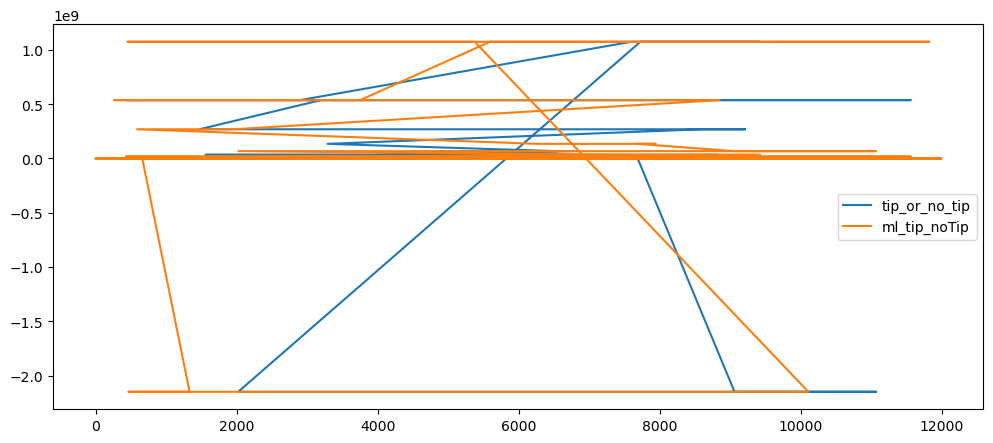

In [27]:
# Plot the actual returns versus the strategy returns
(1+mlpc_predictions_df[['tip_or_no_tip', 'ml_tip_noTip']]).cumprod().plot(figsize=(12,5))